<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/25_1_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KNN
# k-nearest neighbor
# 인스턴스 기반 모델 (데이터가 있어야 한다.)
# heuristic하게 k 값을 결정한다. (3, 5, 7, 9 ...) 길찾기 로직 : grid 
# 비선형 데이터에 강건하다 (어떠한 형태를 하고 있더라도 유리함)

(1, 5)
1==> [5.1 2.2]
2==> [3.8 3.7]
3==> [3.4 1.9]
4==> [2.9 2.5]
5==> [5.7 3.5]


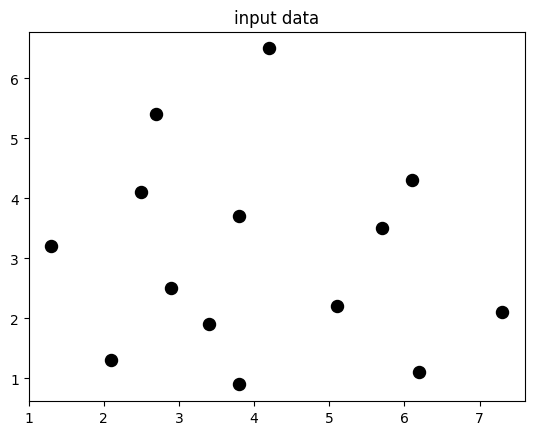

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors 
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], 
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])  # 데이터 포인트의 배열, 각 데이터 포인트는 2차원 좌표로 표현

k = 5
test_datapoint = [4.3, 2.7]
plt.figure()
plt.title("input data")
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='black')
# 학습된 데이터도 모델과 같이 존재하는 인스턴스 기반 학습 모델
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(X)  # KNN 모델 생성 및 훈련 / n_neighbors는 찾을 이웃의 개수(k)
                                                                               # ball_tree 알고리즘 / fit(X)을 통해 데이터 포인트들을 모델에 훈련
# 거리값, 인덱스
distance, indices = knn_model.kneighbors([test_datapoint])  # 테스트 데이터 포인트와 가장 가까운 k개의 이웃 검색 / 이웃까지의 거리와 이웃 인덱스를 출력
print(indices.shape)
for rank, index in enumerate(indices[0][:k], start=1):
  print(str(rank) + '==>', X[index])

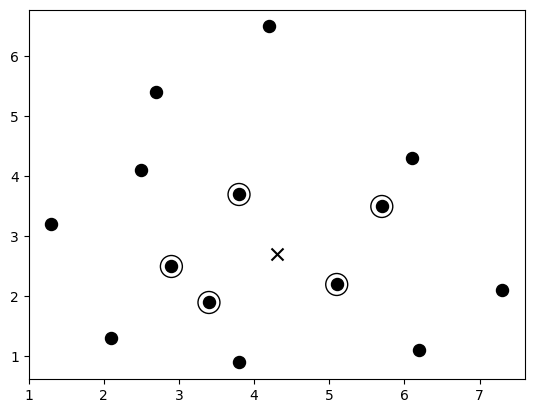

In [2]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')  # 기본데이터 / X[:, 0] : X의 모든 행의 첫번째 열, X[:, 1] : X의 모든 행의 두번째 열
                                                            # marker='o'는 원 형태의 마커, s는 마커의 크기

plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1],  # X[indices][0]은 이웃들의 인덱스를 사용하여 해당 데이터 포인트들을 가져옴
        marker='o', s=250, color='k', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1],  # test_datapoint[0]은 테스트 데이터 포인트의 첫 번째 열
        marker='x', s=75, color='k')
plt.show()

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

input_file = '/content/drive/MyDrive/data.txt'
data = np.loadtxt(input_file, delimiter=',')
X,y = data[:,:-1],data[:,-1].astype(np.int)  # 모든 행의 마지막 열 제외한 열 선택 / 모든 행의 마지막 열을 선택
print(X.shape)  # (300개의 데이터포인트, 2개의 변수)

(300, 2)


<ipython-input-3-f7fb8662ec71>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X,y = data[:,:-1],data[:,-1].astype(np.int)


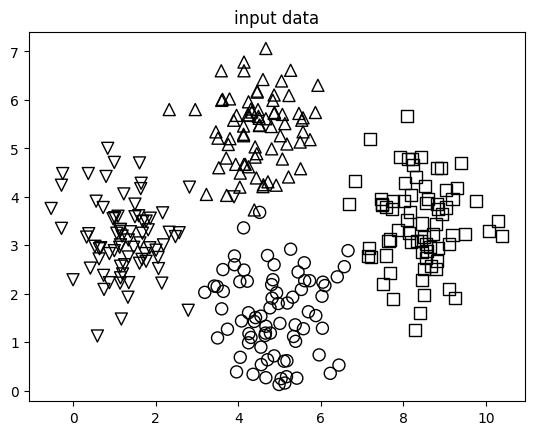

In [4]:
plt.figure()
plt.title('input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
              s = 75, edgecolors='black', facecolors='none')

In [5]:
# KNN classifier를 생성하고 주어진 데이터(X, y) 활용하여 모델 훈련

num_neighbors = 12  # 12개의 이웃
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')  # 분류기 생성 / 거리에 따른 가중치 부여 (가까운 이웃일수록 큰 가중치)
classifier.fit(X, y)  # 모델 훈련

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [ ]:
# np.meshgrid 모델 시각화

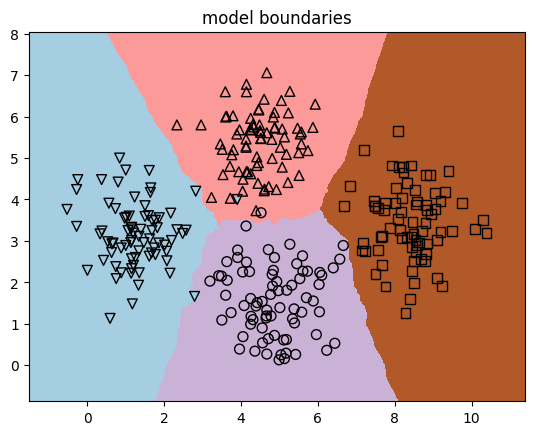

In [6]:
# KNN 모델 분류기 사용하여 모델 경계를 시각화

# 한계값보다 더 폭이 넓게 표현
# np.meshgrid 정점좌표를 결정한다.
# c_ 데이터를 컬럼으로 합병
# pandas에서는 row stack

# 입력변수의 첫번째 열, 두번째 열의 최소값과 최대값을 계산하여 x, y 좌표 범위 정의 (-1, +1하는 이유은 경계를 넓게 표현하기 위해)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step_size = 0.01  # x, y 좌표에서 한 단계의 크기(step size)
# x, y 좌표가 생성됨
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),  # np.meshgrid() : x, y 좌표의 모든 정점을 결정
        np.arange(y_min, y_max, step_size))  # 시작, 종료, 단계의 크기
# column
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])  # np.c_()로 x 좌표와 y 좌표 합병 -> 2차원 배열
output = output.reshape(x_values.shape)  # 원래 형태로 변환 (reshape)

plt.figure()
# 예측 번호를 컬러 번호와 매핑(mapping)하여 색을 칠한다.
# cmap으로 컬러 종류를 결정하고, output으로 컬러 번호를 결정한다.
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker = mapper[i],
            s = 50, edgecolors='black', facecolors='none')
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('model boundaries')

test_datapoint = [5.1, 3.6]
# 12개의 이웃을 찾는 것 : 검색               

In [8]:
# 훈련된 KNN 분류기 사용하여 테스트 데이터포인트의 클래스 예측
classifier.predict([test_datapoint])[0]  
# test_datapoint는 리스트로 래핑되어 전달되어야 한다.
# 1차원 배열로 예측 결과가 반환되는데 [0]을 사용하여 첫번째 요소를 가져오기

1

In [10]:
# 문제 
# y값의 종류는 몇 개인가?
set(y)  # 4개 # 자료구조 : list, tuple, dict, set(set은 중복을 허용하지 않는 데이터)
# y.unique() : 데이터가 ndarray

(300, 2)

In [11]:
# X값은 몇 차원인가?
X.shape

(300, 2)

In [13]:
# X의 5개 값을 출력하기 
# X.head() : head()는 pandas에서 사용
X[:5]  # 리스트 형태 

array([[1.77, 2.67],
       [3.72, 4.03],
       [6.66, 2.89],
       [8.51, 1.98],
       [0.53, 2.98]])

In [16]:
# 테스트 데이터포인트와 가장 가까운 이웃을 찾고 이웃들의 인덱스를 반환
# 파이썬에서 _의 의미는, 이전에 마지막으로 연산한 결과가 _에 저장되어 있음
_, indices = classifier.kneighbors([test_datapoint])  # _ : distance / 12개의 이웃 개수
indices.shape  # (1, 12) (1x12)

# 문제
# 12개의 인덱스를 출력
indices[0]  # 이웃 정점의 인덱스
# 전체 데이터

array([270, 289, 226, 257, 277,  21, 221,  77, 170, 166,  10, 273])

In [20]:
# 문제
# test_datapoint로부터 12개의 데이터 간 거리값을 출력
type(_)
_.shape
_[0]

array([0.58549125, 0.66483081, 0.70092796, 0.7218033 , 0.78873316,
       0.80529498, 0.81400246, 0.81884064, 0.89899944, 0.99924972,
       1.02610916, 1.02941731])

In [22]:
# 문제
# test_datapoint와 289 인덱스 (행인덱스) 에 있는 데이터의 거리값을 실제 계산하여
# 0.66483091이 되는지 확인
X[289, :]  # 289번째 있는 데이터는 행인덱스
np.math.sqrt(sum((test_datapoint - X[289, :])**2))

0.6648308055437865

In [24]:
classifier.predict([test_datapoint])[0] # 투표 -> 도수분포표를 확인

1

In [27]:
# 어떻게 1로 결정되었는지?
# pandas에서 도수분포표는 values_count()
# data.unique()
np.unique(y[indices[0]], return_counts = True)  # return_counts = True : 개수 세기(1이 7개, 2가 5개)

(array([1, 2]), array([7, 5]))

In [44]:
# 문제
# 훈련된 데이터를 이용하여 학습 정확도가 얼마인지 확인
classifier.score(X, y)  # 1.0

# indices[0]에 들어있는 데이터에 대해, 예측된 값을 출력
classifier.predict(X[indices[0]])  # array([2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1])

# indices[0]에 있는 데이터 중 6번째 데이터에 대해 예측
# 2차원으로 입력
classifier.predict([X[indices[0][5]], X[indices[0][6]]])

array([1, 1])

In [45]:
X[indices[0][5]]

array([4.72, 4.31])

In [46]:
X[indices[0]]

array([[4.52, 3.68],
       [4.92, 4.24],
       [5.27, 2.92],
       [4.39, 3.73],
       [4.6 , 4.21],
       [4.72, 4.31],
       [4.61, 4.25],
       [5.22, 4.41],
       [4.71, 2.79],
       [4.13, 3.36],
       [4.87, 2.6 ],
       [4.44, 4.39]])

(87, 65)


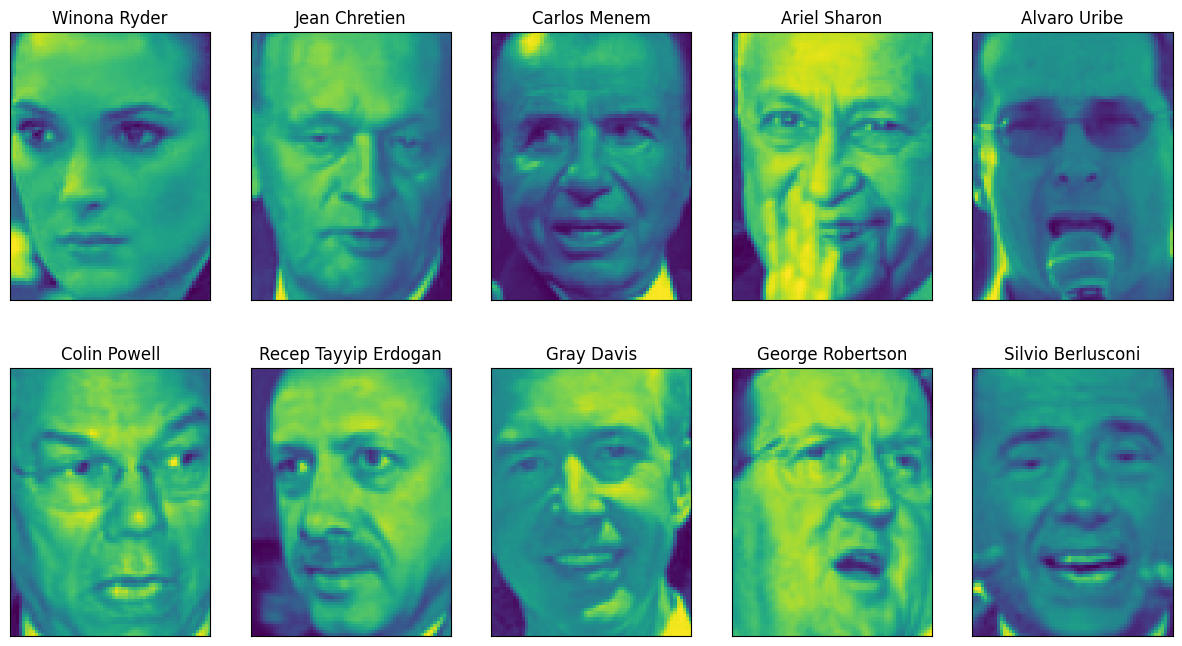

In [48]:
# 이미지 적용  KNN
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)  # min_faces_per_person : 각 인물마다 최소로 가져올 얼굴 이미지 수 (사람당 최소 20장이 있음)
image_shape = people.images[0].shape  # 이미지에 여러장 -> 이미지 size
print(image_shape)  # 87, 65
# 도화지 10장 
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw = {'xticks' : (), 'yticks' : ()})  # 2x5 크기의 서브플롯 / x, y축 눈금(ticks) 비활성화
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [49]:
# 문제 : 이미지 장수와 사람 수를 확인
# people에 입력된 내용
# 이미지 한장의 사이즈 : (87, 65)
# 독립변수인 images, 종속변수 : target
# 이미지 장수 : 3023
# 이미지 장수와 사람의 수는 다름
# target_names은 사람에 대한 인명수를 확인한다.


people.target[0:10], people.target_names[people.target[0:10]]  # people 데이터셋의 첫 10개 이미지의 타겟 레이블, 레이블명
print('people.images.shape: {}'.format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))  # 클래스(인물)

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [50]:
# 도수분포표 (bincount() : people.target 배열에서 각 타겟 레이블의 빈도수를 계산 / 인물명과 해당 빈도수 출력)
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):  # counts와 people.target_name 순회하며 값을 count, name에 할당
  print("{0:25} {1:3}".format(name, count), end = ' ')  # name을 25자리로 정렬하여 출력, count는 3자리로 정렬하여 출력
  if (i + 1) % 3 == 0:  # i+1 값이 3의 배수일 때 줄바꿈 출력 (출력 결과를 세개씩 한 줄에 출력하기 위한 조건)
    print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [51]:
# 특정 조건을 만족하는 얼굴 이미지와 타겟 레이블을 선택하여 데이터 전처리
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):  # 62명에 대하여 (클래스(인물) 개수가 62)
  mask[np.where(people.target == target)[0][:50]] = 1  # 50개의 이미지로 통일
X_people = people.data[mask]  # boolean indexing
y_people = people.target[mask]
X_people = X_people / 255.  # 부동소수점 이미지 (정수 이미지, 부동소수점 이미지) (X_people의 모든 요소를 255로 나누어 정규화)

<ipython-input-51-f4d3b2013c05>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype = np.bool)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  # X_people 데이터와 y_people 타겟 레이블을 훈련 셋과 테스트 셋으로 분할
    X_people, y_people, stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)  # KNeighborsClassifier 객체 생성 / n_neighbors = 1은 분류 시 가장 가까운 1개의 이웃 고려
knn.fit(X_train, y_train)  # 훈련 데이터에 대해 KNN 학습
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))  # 테스트셋에 대해 학습된 모델의 정확도 출력 (score)

1-최근접 이웃의 테스트 세트 점수: 0.22


In [55]:
87*65  # 1픽셀이 하나의 변수가 됨 (고차원)
       # 이미지 한장 -> 학습 -> fully connected (일렬로)

5655

In [54]:
X_train.shape 
# 변수의 개수가 5655 (고차원)
# bias variance -> bias 에러는 감소하고, variance는 늘어난다.
# 차원 축소

(1547, 5655)

In [ ]:
# PCA
# 원본 데이터에 대한 상관계수행렬( 5655x5655 행렬 )이나 공분산행렬이 있어야 한다.
# 정방행렬, 대칭행렬
# 고유값분해
# 고유값, 고유벡터
# 고유벡터는 정직교 벡터이고, 분산의 크기가 고유값이다.
# 출력할 때에는 이미 정렬이 되어 출력이 된다.
# n_components (100개) : 분산이 큰 변수만 남게 한다.

In [53]:
from sklearn.decomposition import PCA  # 주성분 분석
# 비지도 학습

# PCA 객체 생성 / 주성분 개수는 100개 / 주성분 축으로 데이터를 백색화(whitening) / 난수 초기값 / fit() : 주성분 분석을 훈련데이터에 학습
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)

X_train_pca = pca.transform(X_train)  # 훈련 데이터 X_train을 PCA 변환
X_test_pca = pca.transform(X_test)    # 테스트 데이터 X_test를 PCA 변환

print("훈련차원: {}".format(X_train_pca.shape))  # 훈련 데이터의 PCA 변환된 차원 출력 (샘플개수, 주성분 개수)

훈련차원: (1547, 100)


In [57]:
# 5655개의 변수 -> 100개 (연산량에서 차이가 있음 - 메모리 사용 절약)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)  # 차원축소된 훈련데이터 X_train_pca, 타겟 레이블 y_train으로 KNN 분류기 학습
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.30


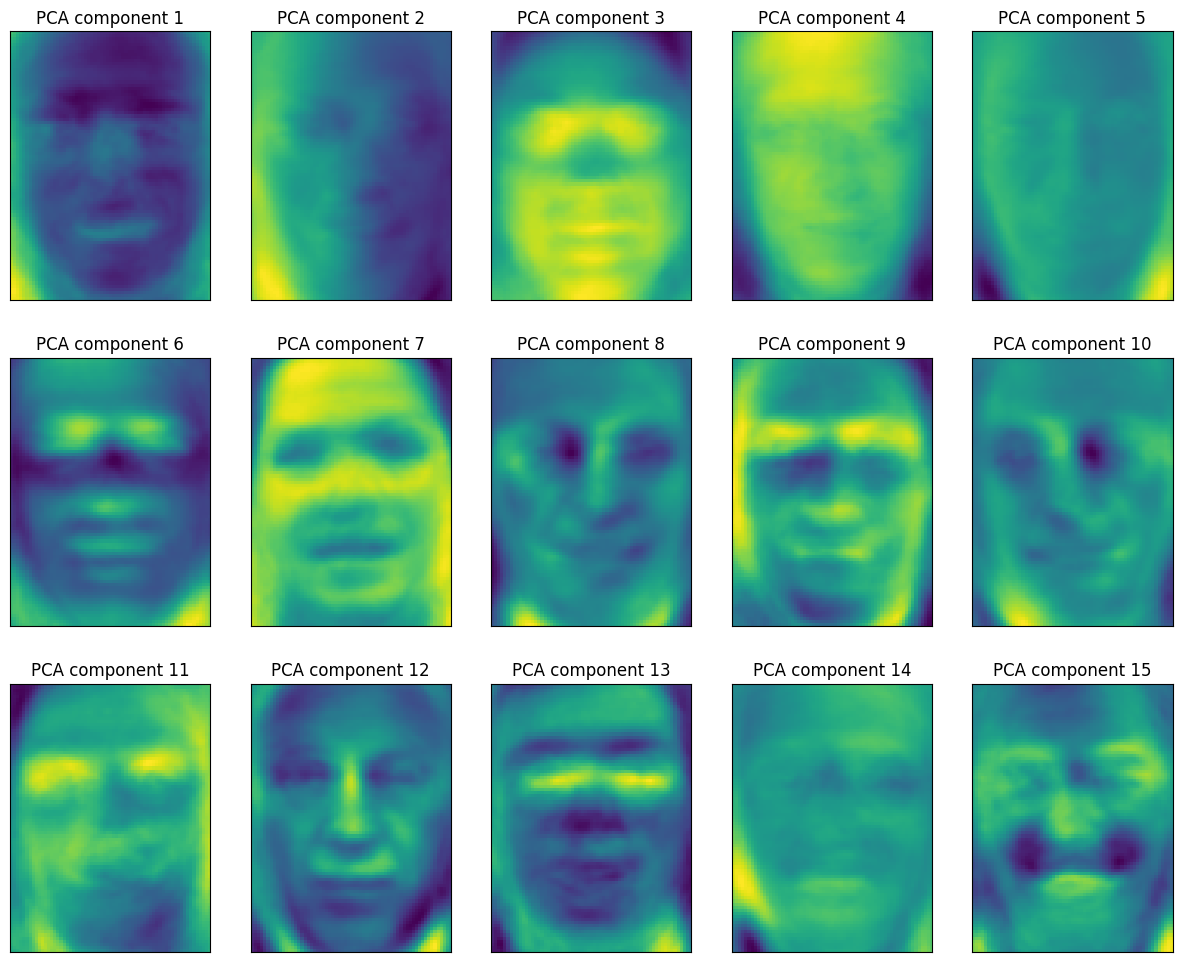

In [59]:
# 100개의 주성분으로 이루어진 데이터로부터 원본 이미지를 복원
# 이미지의 특징행렬중 15번까지의 특정 행렬에 대한 이미지화
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw = {'xticks':(), 'yticks':()})  # 15x12 크기의 3x5 서브플롯, 눈금 미표시
# 5655 * 5655 -> 100번 -> 100개의 특징으로 이미지를 판별한다.
# 5655 * 100  가중치 행렬
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):  # 주성분 벡터 하나씩 가져와 enumerate 사용하여 인덱스 i와 함께 순회
  # 87x65 사이즈
  ax.imshow(component.reshape(image_shape), cmap='viridis')  # 주성분벡터 component를 image_shape 형태로 재구성 이후 imshow()로 이미지 표시 
  ax.set_title("PCA component {}".format((i + 1)))

(516, 10)
(516, 50)
(516, 100)
(516, 500)


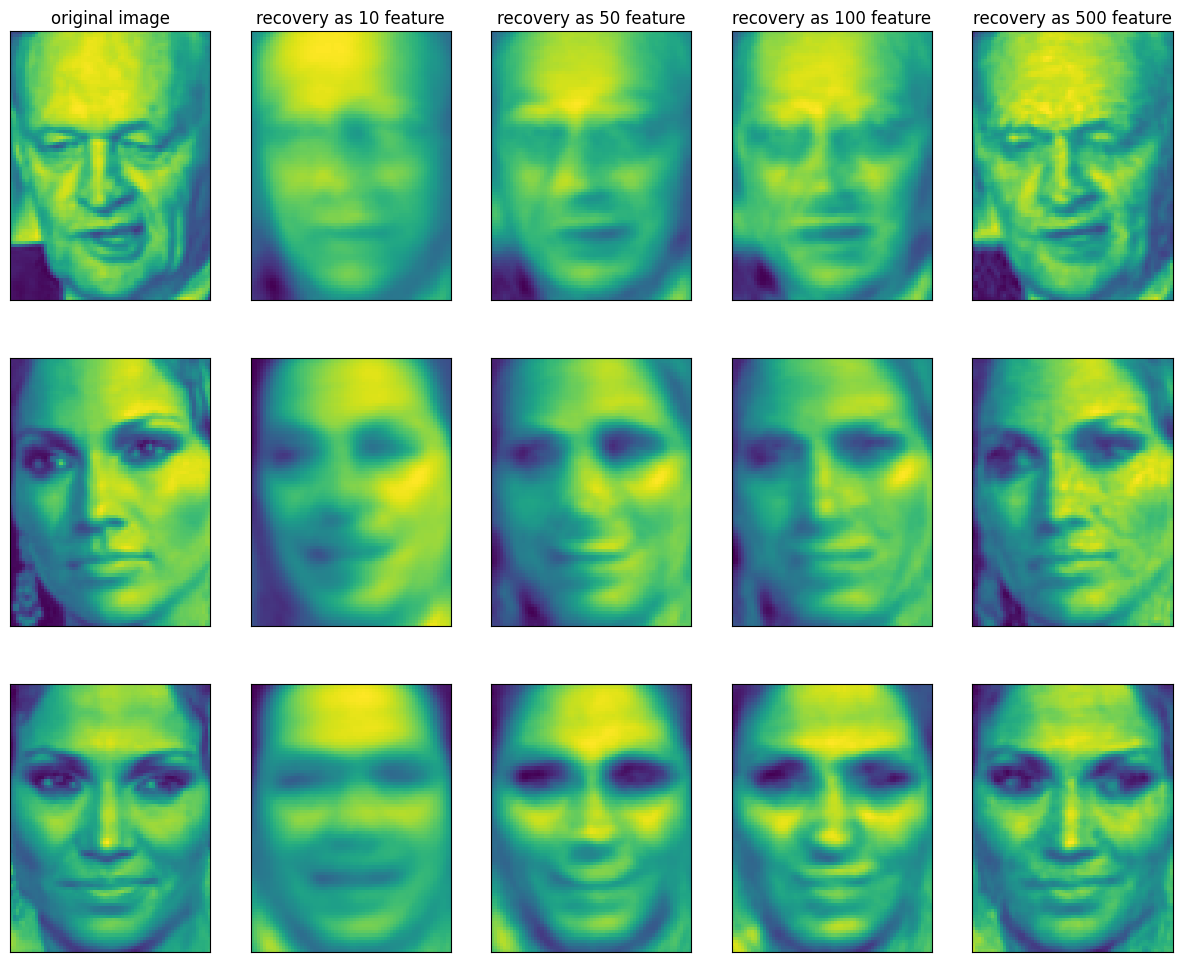

In [63]:
# 컴포넌트 10개, 50개, 100개, 500개를 이용하여 이미지로 역변환 (inverse_transform) (차원축소된 데이터를 원래의 차원으로 복원 후 시각화)
# 주성분 개수가 증가함에 따라, 이미지의 복원 정도를 확인할 수 있다.
# 5655개의 데이터 변수 -> 500개로 표현하기 위해 특징을 추출한다.
reduced_images = []
for n_components in [10, 50, 100, 500]:  # 5655개의 변수 중 10개, 50개, 100개, 500개의 특징만 골라 추출
  pca = PCA(n_components = n_components)  # 축의 개수, PCA 객체 생성 / 고유벡터 5655 * 5655(10) => 컴포넌트(Component)
  # 원본이미지 : (87*65 => 5655)  @ (5655 * 10) => 5655 * 10  (정직교하는 좌표계에 특징이 추출되는 형태)
  pca.fit(X_train)
  X_test_pca = pca.transform(X_test)  # 정방향 변환행렬 / 테스트데이터 X_test를 주성분 축으로 변환하여 PCA 변환 결과를 얻기
  print(X_test_pca.shape)  # 변환된 데이터 형태
  # 10 @ (10 x 5655)
  X_test_back = pca.inverse_transform(X_test_pca)  # 5655, 역방향 변환행렬 / 추출된 특징 이용하여 복원, PCA 변환된 데이터를 역변환하여 원래 차원으로 복원
  reduced_images.append(X_test_back)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw = {'xticks':(), 'yticks':()})  # 3x5 크기의 서브플롯

for i, ax in enumerate(axes):  # 서브플롯 순회하면서 이미지 표시 
  ax[0].imshow(X_test[i].reshape(image_shape))  # 첫번째 열의 서브플롯에는 원본 이미지
  for a, X_test_back in zip(ax[1:], reduced_images):  # 두번째 열부터는 복원된 이미지
    a.imshow(X_test_back[i].reshape(image_shape))  # reduced_images에서 가져온 복원된 이미지 표시

axes[0, 0].set_title("original image")
for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):  # 첫번째 행의 서브플롯으로부터 각각의 주성분 개수에 해당하는 제목을 설정
  ax.set_title("recovery as %d feature" % n_components)

# 5655개의 픽셀 -> 500개만 선택하여도 원본 데이터(사진)을 복원할 수 있는 수준.

In [ ]:
# 문제
# (20, 30, 90)
# (80, 44, 40)
# 두 벡터의 거리값, 내적을 구하시오
# 두 벡터의 방향값을 각각 구하시오

In [68]:
dist = np.sqrt((20 - 80) ** 2 + (30 - 44) ** 2 + (90 - 40) ** 2)
print(dist)

dist1 = np.sqrt(20 ** 2 + 30 ** 2 + 90 ** 2)
[20, 30, 90] / dist1

79.3473376995095


array([0.20628425, 0.30942637, 0.92827912])

In [69]:
np.sqrt(0.20628425 ** 2 + 0.30942637 ** 2 + 0.92827912 ** 2)

0.9999999974387069

In [70]:
dist2 = np.sqrt(80 ** 2 + 44 ** 2 + 40 ** 2)
[80, 44, 40] / dist2

array([0.80257235, 0.44141479, 0.40128618])

In [72]:
dot_val = 20 * 80 + 30 * 44 + 90 * 40  # 내적 사이각 : 크기값이 고려된 사이각
costheta = dot_val / (dist1 * dist2)

In [73]:
# costheta -> theta (acos)
theta = np.arccos(costheta)
theta  # 라디안(radian) (컴퓨터에서 각도는 라디안으로 인식)

0.8303072556381692

In [74]:
# 라디안을 각도로 변환
np.degrees(theta)  # 47.57310144715702

47.57310144715702

In [75]:
import numpy as np
a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype = np.float64)

In [77]:
np.sqrt(np.sum((a_64 - b_64) ** 2))

0.035902646142031334

In [85]:
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype = np.float64)
dist_64_np

array([0.03590265])

In [86]:
from sklearn import metrics
dist_64_sklearn = metrics.pairwise.pairwise_distances([a_64], [b_64], metric = 'euclidean')
dist_64_sklearn

array([[0.03590265]])

In [87]:
metrics.pairwise.pairwise_distances([a_64], [b_64], metric='l1')

array([[0.043]])

In [83]:
metrics.pairwise.pairwise_distances([a_64], [b_64], metric='l2')

array([[0.03590265]])

In [84]:
metrics.pairwise.pairwise_distances([a_64], [b_64], metric='manhattan')

array([[0.043]])

# 클러스터 : 비슷한 특성이나 속성을 가진 데이터들의 그룹
# 클러스터링 : 비슷한 특성을 가진 데이터들을 그룹으로 묶는 비지도학습
- 데이터 유사성 기반으로 데이터를 그룹화하는 작업
- 비슷한 특성을 가진 데이터는 같은 클러스터에 속하고, 서로 다른 클러스터에 속한 데이터들은 서로 다른 특성을 가지고 있다.

In [ ]:
# kmeans : 비지도학습 알고리즘으로, 라벨링, 대분류, 원형 이상치, 벡터 양자화(압축) 시 사용한다.
# 중심 기반 알고리즘
# k : 중심을 결정
# k개의 중심 -> 중심과의 거리  (1개의 데이터는 중심개수만큼 거리값을 계산한다.)
# 데이터 포인트 : 50 * 그룹이 3 = 150번 계산
# 가장 가까운 그룹에 배치한다.
# 중심값을 재계산 => 중심과의 거리값 계산

In [88]:
# k-means 클러스터링 / iris 데이터셋에서 처음 두개([:, :2])의 특성 이용하여 클러스터링 수행
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
iris = datasets.load_iris()  # 독립변수 4개, 종속변수 1개
X = iris.data[:, :2]  # iris 데이터셋에서 특성 데이터의 처음 2개 열 선택하여 X에 저장
y_iris = iris.target  # iris 데이터셋의 target 변수 (레이블)
km2 = cluster.KMeans(n_clusters = 2).fit(X)  # heuristic하게 결정 -> WSS값으로, 엘보우로 판단 / 2개의 클러스터로 클러스터링 수행
km3 = cluster.KMeans(n_clusters = 3).fit(X)  # 3개의 클러스터
km4 = cluster.KMeans(n_clusters = 4).fit(X)  # 4개의 클러스터

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K = 4, J=28.03')

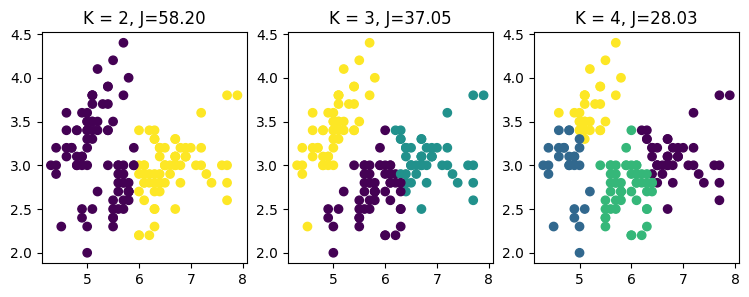

In [89]:
plt.figure(figsize=(9, 3))
plt.subplot(131)  # 1행 3열 1번째
plt.scatter(X[:, 0], X[:, 1], c = km2.labels_)
plt.title("K = 2, J=%.2f" % km2.inertia_)  # 그룹 내 거리값 / K : 클러스터의 개수, J는 클러스터의 응집도(inertia) 
                                           # 응집도 : 클러스터 내 데이터 포인트들이 얼마나 밀집해있는가? (응집도는 클러스터링 성능 평가 시 사용)

plt.subplot(132)  # 1행 3열 2번째
plt.scatter(X[:, 0], X[:, 1], c = km3.labels_)
plt.title("K = 3, J=%.2f" % km3.inertia_)

plt.subplot(133)  # 1행 3열 3번째
plt.scatter(X[:, 0], X[:, 1], c = km4.labels_)
plt.title("K = 4, J=%.2f" % km4.inertia_)

In [90]:
km4.cluster_centers_  # 집단의 특성을 나타낸다.

array([[6.85348837, 3.1       ],
       [4.77777778, 2.94444444],
       [5.90980392, 2.73529412],
       [5.22068966, 3.66551724]])

In [91]:
km3.labels_  # 레이블

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [92]:
km3.inertia_  # 응집도

37.05070212765956